In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, post_processing_function, plot_beta_errors, plot_beta_error_norm, plot_betas, plot_mined_block_percent, plot_block_difficulty, plot_kqi_ratio
from simulation import (difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance)
ms = load_from_json(deepcopy(math_spec_json))

Placeholder has no control action options
Metrics:
Difficulty Mu                        1439.505590
Difficulty Sigma                      112.187273
Block Reward Ratio Mu                   0.005683
Block Reward Ratio Sigma                0.001537
Conversion Rate Mu                      0.000784
Conversion Rate Sigma                   0.000223
K Qi / K Quai Mu                        1.359115
K Qi / K Quai Sigma                     0.279597
Mined Ratio (Block Percent) Mu          0.153688
Mined Ratio (Block Percent) Sigma       0.117428
Time to Beta Convergance                5.000000
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN         -5.017167              0.05   
1           3.750788       -0.037748         -5.017167              0.05   
2          -5.757373        0.059041         -5.017167              0.05   
3         -12.475094        0.129400         -5.017167              0.05   
4       

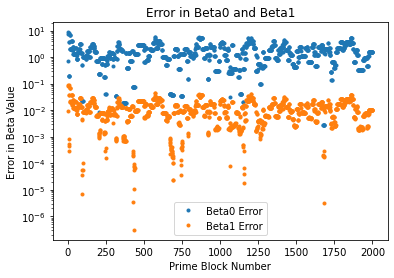

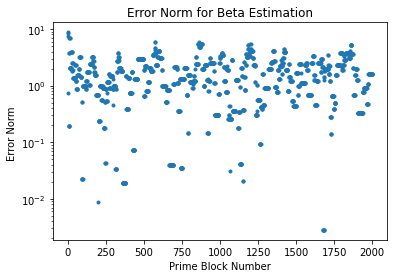

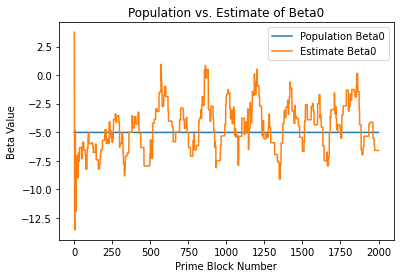

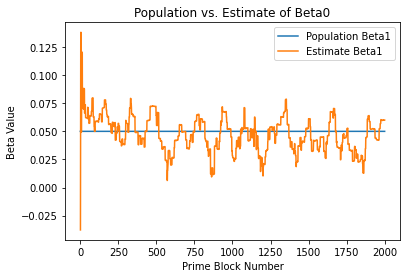

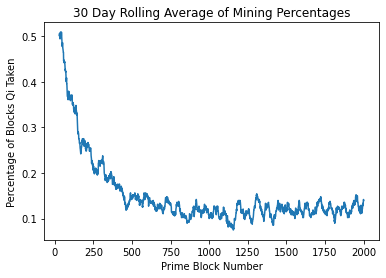

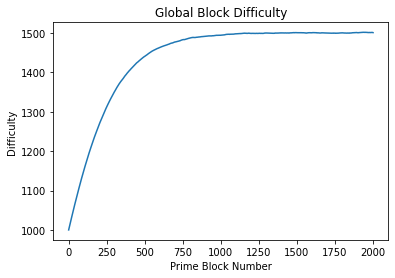

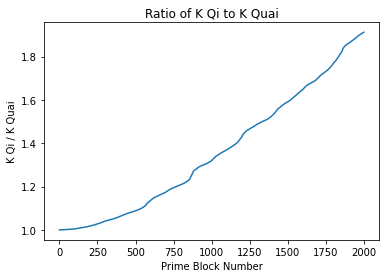

In [2]:
T = 2000
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Update Population Beta Wiring",
            "Log Simulation Data Mechanism",] * T

aggregate_hashpower_series = [25 for _ in range(1, 10002)]


population_beta_signal = [np.array([-5.017166594399686, 0.05])]*(T+10)



def display_results(df, metrics):
    print("Metrics:")
    print(metrics)
    print()
    print("Data:")
    print(df)
    print()
    print("Visualizations:")
    print()
    plot_beta_errors(df)
    plot_beta_error_norm(df)
    plot_betas(df)
    plot_mined_block_percent(df)
    plot_block_difficulty(df)
    plot_kqi_ratio(df)

            
experiment = {"Name": "Test",
               "Param Modifications": {"Aggregate Hashpower Series": aggregate_hashpower_series,
                                       "Population Beta Signal": population_beta_signal},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-5.017166594399686, 0.05]),
                                       },
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance])

display_results(df, metrics)